## Experiment 3: growth rates
- Research question: What genes are associated with glucose uptake and regulation in e. coli?
- Compare multiple gene knockouts to determine and how they change growth rates
## Genes associated w/glucose (from EcoCyc)
- Crp: b3357, reacts with cAMP and forms CRP-cyclic-AMP, DNA-binding transcriptional dual regulator (regulates the expression of over 180 genes)
- ptsA:        b3947, triphosphoryl transport protein, ptsA encodes a protein with similarity to sugar phosphotransferase system (PTS) components
- ptsG:        b1101, glucose-specific phosphotransferase system (PTS)
- ptsH:        b2415, sugar transporter, phosphoenolpyruvate:sugar phosphotransferase system (PTSsugar)
- ptsI:        b2416, sugar phosphotransferase system (PTSsugar)
- ptsN:        b3204, phosphoenolpyruvate (PEP)-dependent carbohydrate phosphotransferase system (PTS)
- ptsP:        b2829, nitrogen phosphotransferase system (PTS Ntr), responds to nitrogen availability (supposedly)
- dhaM (ptsD): b1198, glycerol degradation (limited EcoCyc info)
- fruA (ptsF)  b2167, inner membrane, helps fruA use fructose as a carbon source
- manX (ptsL)  b1817, phosphorylation of 2-deoxyglucose, mannose permease complex
- manY (ptsP)  b1818, forms the transmembrane channel of the E. coli mannose permease complex works with manZ
- manZ (ptsM)  b1819, forms the transmembrane channel of the E. coli mannose permease complex, works with manY
- nagE (ptsN): b0679, part of superfamily of the phosphoenolpyruvate (PEP)-dependent, sugar transporting phosphotransferase system (PTSsugar)
- npr (ptsO):  b3206, second phosphotransfer protein of the nitrogen phosphoenolpyruvate (PEP)-dependent phosphotransferase system (PTSNtr)

## Related observations
- sugar phosphotransferase system (PTSsugar): ptsH, ptsI, nagE, ptsG
- nitrogen phosphotransferase system (PTS Ntr): ptsP, npr?
- phosphoenolpyruvate (PEP)-dependent carbohydrate phosphotransferase system: ptsN
- ManXYZ mannose permease complex: manX, manY, manZ

- PTSsugar genes are close in proximity
- ManXYZ mannose permease complex genes are close in proximity

In [1]:
import pandas
from time import time
from cobra.io import load_model
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
from pprint import pprint

cobra_model = load_model("textbook")
ecoli_model = load_model("iJO1366")

In [43]:
cobra_model

Name,e_coli_core
Memory address,15c748500
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [44]:
ecoli_model

Name,iJO1366
Memory address,15c63ddf0
Number of metabolites,1805
Number of reactions,2583
Number of genes,1367
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [45]:
solution = ecoli_model.optimize()
print('complete model: ', solution)

complete model:  <Solution 0.982 at 0x16643f9b0>


In [46]:
PTS_sugars = ['b2415', 'b2416', 'b0679', 'b1101']
print(PTS_sugars, end=' ')

['b2415', 'b2416', 'b0679', 'b1101'] 

In [47]:
def get_gene_index(g):
    """takes a gene id as a parameter and returns gene index"""
    index = ecoli_model.genes.index(g)
    return index

In [48]:
def get_reaction_id(g):
    """takes a gene id as a parameter and returns the reaction at the same index"""
    gene = ecoli_model.genes.get_by_id(g)
    print(gene)
    index = get_gene_index(gene)
    reaction_id = ecoli_model.reactions[index].id
    return reaction_id

In [49]:
for g in PTS_sugars:
    i = get_gene_index((g))
    print(f"index of {g} is {i}")

index of b2415 is 65
index of b2416 is 69
index of b0679 is 66
index of b1101 is 67


In [50]:
print(f'Performing Experiment #1: single KO in PTS-sugar system')
print('\n')
print('Complete model: ', ecoli_model.optimize())
print('\n')
print('Results (KO model):')
with ecoli_model:
    ecoli_model.genes.b2415.knock_out()
    print('ptsH knocked out: ', ecoli_model.optimize())
    ecoli_model.genes.b2416.knock_out()
    print('ptsI knocked out: ', ecoli_model.optimize())
    ecoli_model.genes.b0679.knock_out()
    print('nagE knocked out: ', ecoli_model.optimize())
    ecoli_model.genes.b1101.knock_out()
    print('ptsG knocked out: ', ecoli_model.optimize())

Performing Experiment #1: single KO in PTS-sugar system


Complete model:  <Solution 0.982 at 0x166468800>


Results (KO model):
ptsH knocked out:  <Solution 0.972 at 0x166468860>
ptsI knocked out:  <Solution 0.972 at 0x166468470>
nagE knocked out:  <Solution 0.972 at 0x166468050>
ptsG knocked out:  <Solution 0.972 at 0x166468410>


In [51]:
# single_gene_deletion(ecoli_model, ['b2415', 'b2416', 'b0679', 'b1101'])
single_ko_results = single_gene_deletion(ecoli_model, ['b2415', 'b2416', 'b0679', 'b1101'])
print("Results (single gene deletion): \n", single_ko_results)

Results (single gene deletion): 
        ids    growth   status
0  {b0679}  0.982372  optimal
1  {b2416}  0.972003  optimal
2  {b2415}  0.972003  optimal
3  {b1101}  0.982372  optimal


In [52]:
start = time()  # start timer()
single_gene_deletion(ecoli_model, ['b2415', 'b2416', 'b0679', 'b1101'])
t1 = time() - start
print("Single gene deletions for 4 genes completed in "
      "%.2f sec with 1 core" % t1)

Single gene deletions for 4 genes completed in 4.46 sec with 1 core


In [53]:
growth_rates = []
for i in single_ko_results["growth"]:
    growth_rates.append(i)

In [54]:
solution = (ecoli_model.optimize())
complete_value = solution.objective_value

In [55]:
growth_rates.append(complete_value)

In [56]:
x_val = (PTS_sugars + ["Control"] )

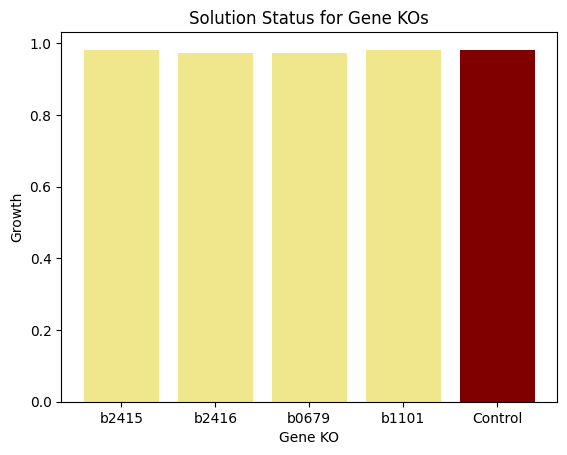

In [57]:
import matplotlib.pyplot as plt

# type(plt.bar)
plt.xlabel("Gene KO")
plt.ylabel("Growth")
plt.title("Solution Status for Gene KOs" )
colors = ["khaki", "khaki", "khaki", "khaki", "maroon"]

plt.bar(x_val, growth_rates, color = colors)

plt.show()

In [58]:
# results: All KO have a similar effect on the solution space. The growth rate remains optimal with all single gene deletions.

In [60]:
growth_rates_multiple_KO = []
growth_rates_multiple_KO.append(solution_multiple_kos)
x_val_multiple_KO = (["PTS sugar complex KO"] + ["Control"])

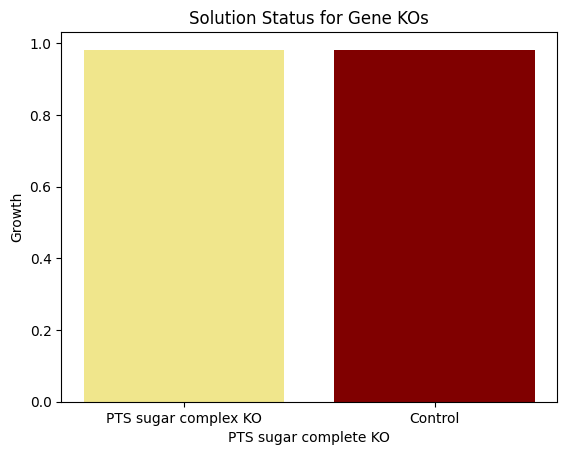

In [61]:
plt.xlabel("PTS sugar complete KO")
plt.ylabel("Growth")
plt.title("Solution Status for Gene KOs")
colors = ["khaki", "maroon"]

plt.bar(x_val_multiple_KO, growth_rates_multiple_KO, color=colors)

plt.show()

In [62]:
# results: For single KOs, all KO have a similar effect on the solution space. The growth rate remains optimal with all single gene deletions. For complete PTS system KO, the growth rate remains optimal with multiple deletions.